# __The tale of Roger Federer__

#### Michailia Panagiotidi (MSc Data Science - LSE)

![Image of Federer](https://i.pinimg.com/originals/1f/ea/5a/1fea5ab6bbc047db3da230edbded575b.jpg)

## Introduction  

Roger Federer is a 37 year old Swiss professional tennis player, currently ranked No.3 in men's singles by the Association of Tennis Professionals (ATP). He turned pro in 1998 and is currently going though his 21st year on the tennis tour, having one of the longest careers in the sport. Federer has been distinguished for his 'effortless' playing style, his humble persona and his prolonged dominance in the game. He holds multiple open era tennis records in the males tour and is most often the favourite in who is the Greatest of All Time (GOAT) debates between analysts. Federer has also been winning the ATP fans' favourite award since 2003. Needless to say, I am also one of his million fans. <br /> 

As information is becoming more easily available, people are starting to see sports form a different perspective and dive more into the statistics. With this in mind, this report aims to travel through Federer's career using some data visualisations, observe some of his key playing characteristics along the years and end with some modelling and analysis of his winning probabilities. Ultimately, the goal is to analyse how he has adjusted his game (if so) to stay at the top of the rankings for this long and make a bold statement on whether it is worth for him to keep playing. 


## Research Questions

More specifically though this analysis, the aim is to:
 - Understand his career progression through visualising some of his background; who is Roger Federer?
 - Compare Federer's playing style through the years; examine his key playing weapons  
 - Model the probability of him winning a match based on his latest performance 
 - Can he keep his best any longer?
 
As it can be seen, it took him a few years to climb the rankings, but once he eventually reached the very top, it was clear that he was there to stay. At about the middle of his career though he suffered through some injuries that caused his performance to decline. Nonetheless, there doesn't seem to be a particular pattern regarding his performance in terms of aces, forehand and backhand winners or net points won. If there is something to be said, that is that he has probably improved in the past two years, trying to keep points shorter. Additionally, it seems that taking only into account his past two year performance, he has a very high probability of winning matches against a varied pool of players in 2019, so why not keep going?

## The Data

For the purpose of the above, data is being used from the work of Jeff Sackman on his github account, that is being continously updated. His data files are widely used in the community as tennis data are not generally available to the public. Two of his projects are of interest, [tennis_atp](https://github.com/JeffSackmann/tennis_atp) [1] and [tennis_MatchChartingProject](https://github.com/JeffSackmann/tennis_MatchChartingProject) [2]. The Match Charting Project (MCP) [2] is a crowdsourced data initiative aiming to attain high quality shot-by-shot data for matches. This is a project started in 2013 and currently has about 4,400 matches (male & female). This repository includes .csv files of many different types, from raw shot-by-shot data,to  match characterisitcs and several specific files regarding different statistcs. What it lacks though is clear results data for this reason [1] is also used. The tennis_atp repository contains rankings since 1983 and match results since 1968, including some match statistics for later years. Each year is stored in a separate .csv file and information is taken from the official ATP website. The two datasets [1] & [2] complement each other, as the first doesn't include the detailed statistics that can be found in [1], and [2] doesn't clearly contain information about the winner of a match. Unfortunately the two repositories do not have a common id for each match.  <br /> 
The files necessary for the analysis were chosen and downloaded from the given links. More details and examples of the data will be given along the way depending on the file and the source, as particularly for [2], files have varying formats while always connected with a specific key (match_id). Additionally, for convinience, aggregate ranking data specifically regarding Roger Federer is also obtained from the [official ATP website](https://www.atptour.com/en/players/roger-federer/f324/rankings-history) [3].

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import csv

To continue with the data exploration and analysis the necessary libraries are loaded as shown above.

## Who is Roger Federer? 
### Ranking Analysis
To connect the many pieces of further analysis it is utterly important to appreciate how Federer's career has progressed through the years. How long did it take to peak, and how long did he dominate, did he struggle through any injuries? A carreer of more than 20 years is expected to include all of these points. The first step towards this is how his ranking has changed over his career. This is probably the best indication of over-all performance and success. Data is taken from his personal webpage of the official ATP site [3] Briefly, the tennis ranking system adds points if the player performed better from the respective week in the previous year and substracts accordingly. No.1 is the top ranking.

In [2]:
#web scrape ranking information from official site as datasouce has just ranking per year in different files
ranking=pd.read_html('Roger Federer _ Rankings History _ ATP Tour _ Tennis.html', parse_dates=True)
#print(len(ranking))
ranking = ranking[1]

#remove sinlges rankings before turning pro - contain a T at the end
ranking = ranking[ranking.Singles.apply(lambda x: x.isnumeric())]
ranking = ranking.iloc[::-1]
ranking = ranking[ranking.Singles != '0']

#find minimum singles ever ranking - need to transform to integers
#s_max = max(ranking.Singles.astype(int))

print(ranking.describe()) #can see he came first 271 weeks 
print('\n')
print('Counts of weeks in each of the most reccuring rankings')
print(ranking.Singles.value_counts(normalize=False)[:5])
print('\n')
print(ranking.head())

              Date Singles Doubles
count          949     949     949
unique         949      91     316
top     2008.07.07       1       0
freq             1     271     210


Counts of weeks in each of the most reccuring rankings
1    271
2    191
3    156
5     32
4     29
Name: Singles, dtype: int64


           Date Singles Doubles
956  1998.04.27     711    898T
955  1998.05.04     711    899T
954  1998.05.11     705    894T
953  1998.05.18     704    892T
952  1998.05.25     704    894T


The first table gives a brief description of the data indicating that data is available for about 950 weeks. Tournaments take place most weeks of the year and rankings usually update every week, except for the four main tournaments (Grand Slams) that last two weeks and rankings update when they are completed. This data provides information for every week an official update occurs.  <br />
It can be seen that Federer was at the top of the rankings for 271 (updating) weeks (research reveals this is actually 310 calendar weeks). He holds the record for most total weeks on No.1. The second table also demonstrates that he has been in the Top 5 for the greatest part of his career. <br />
An example of the data is also provided at the last table. Focus will be given to the Singles rankning which is where Federer thrived.  

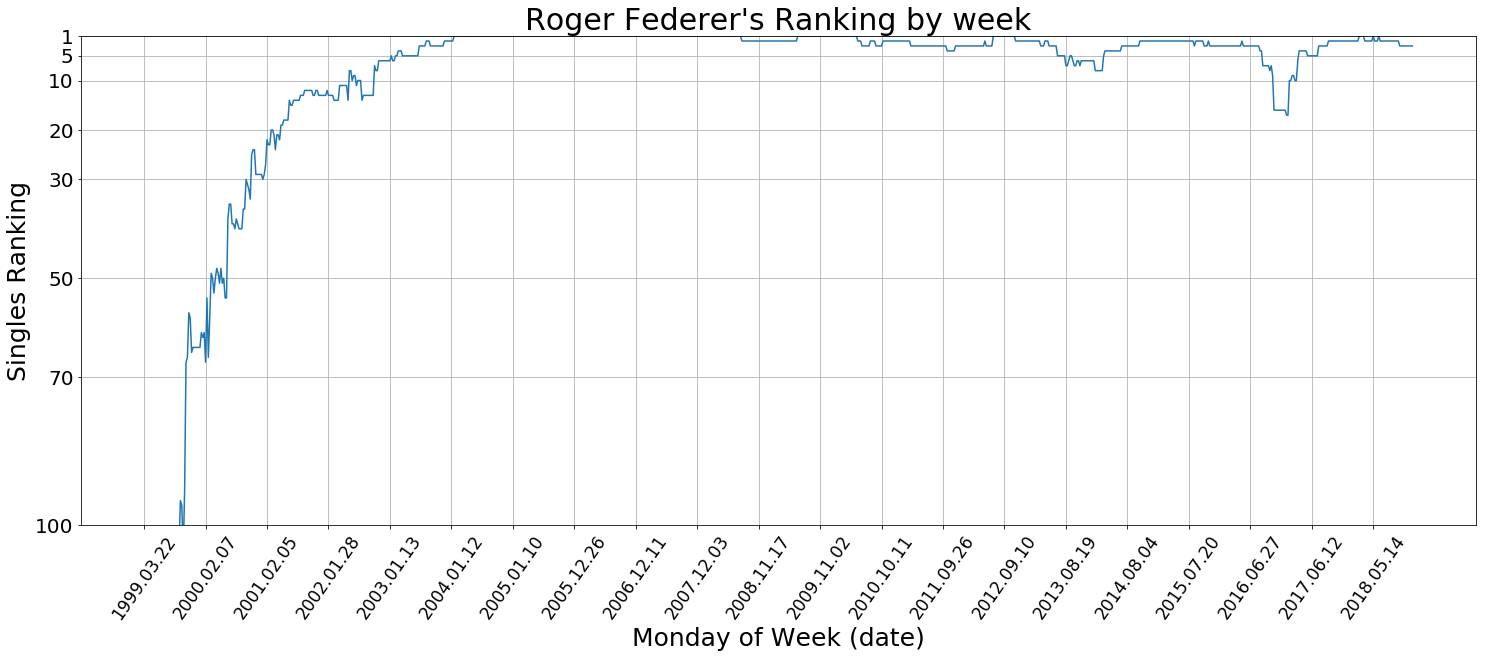

In [3]:
fig,ax = plt.subplots(1, 1, figsize=(25,9))
plt.grid()
s=40
#start from 40; seems like it takes about a year to get into the top100 and that is much more interesting
plt.plot(ranking['Date'][s:], ranking.Singles.astype(int)[s:])
plt.title("Roger Federer's Ranking by week", fontsize = 30)
plt.ylabel('Singles Ranking', fontsize=25)
plt.xlabel('Monday of Week (date)', fontsize = 25)
#not very interesting since y range is very big
#plt.ylim(s_max,1)
#allows to zoom in
plt.ylim(100,1)

#44 is about a year. N.B. Some weeks it doesn't update .: <52
ax.set_xticks(ranking['Date'][s::44]) #show less to read more!
ax.set_xticklabels(ranking['Date'][s::44], rotation=55, fontsize=17)
int_rank = [100,70,50,30,20,10,5,1]
ax.set_yticks(int_rank)
ax.set_yticklabels(int_rank, fontsize=20)

plt.show()

The above line plot depicts how Federer's ranking fluctuated over the years, starting from about a year after he turned pro, when he broke into the top100. It is obvious that for most of his career he has managed to stay at the very top of the rankings. <br />
It took him about three years to reach the Top 20, and he kept climbing up steadily until he reached No.1. Federer reached the top of the rankings in early 2004 and stayed there for more than four years, achieving the record for most consecutive weeks at No.1. Those were the years of complete dominance by Federer. In general there isn't a lot of variation in his rankings, though some drops, probably due to injuries, are evident. They will be further examined in the chart below. 

C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


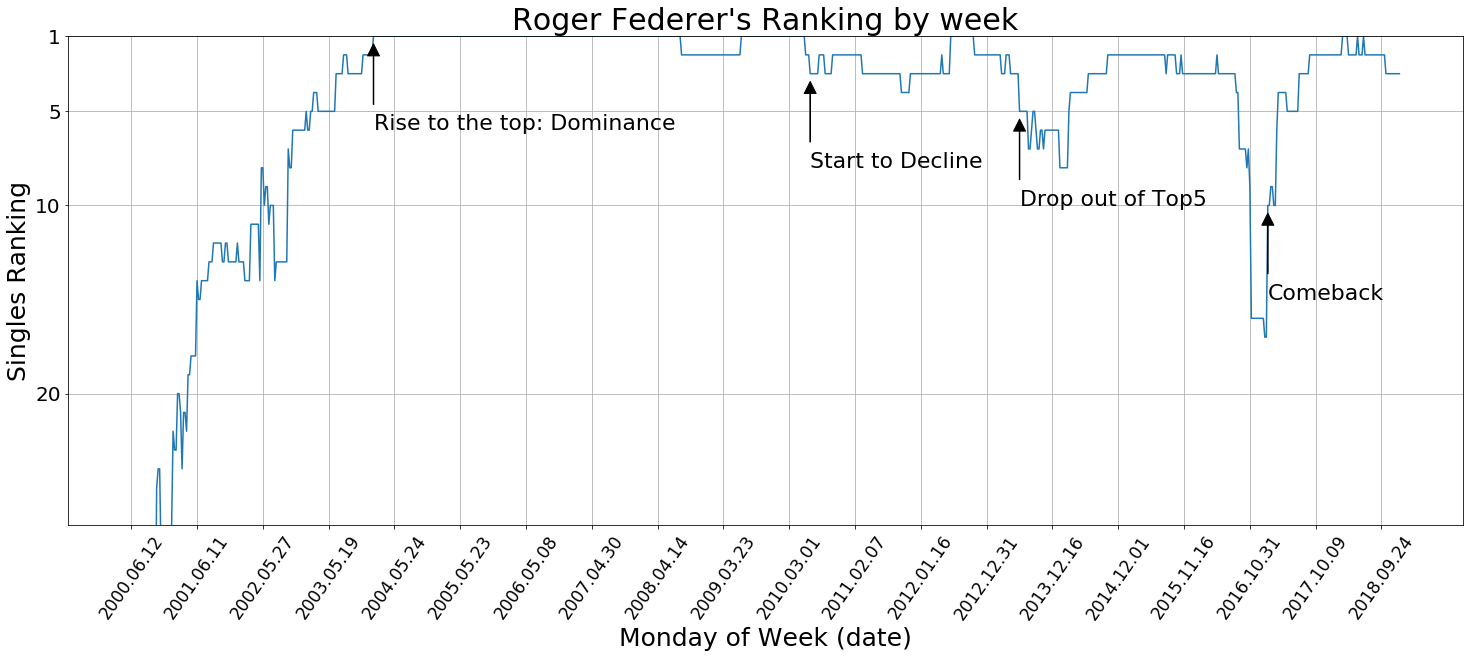

In [4]:
fig,ax = plt.subplots(1, 1, figsize=(25,9))
plt.grid()
s=100

plt.plot(ranking['Date'][s:], ranking.Singles.astype(int)[s:])
plt.title("Roger Federer's Ranking by week", fontsize = 30)
plt.ylabel('Singles Ranking', fontsize=25)
plt.xlabel('Monday of Week (date)', fontsize = 25)
#not very interesting since y range is very big

#44 is about a year. N.B. Some weeks it doesn't update .: <52
ax.set_xticks(ranking['Date'][s::44]) #show less to read more!
ax.set_xticklabels(ranking['Date'][s::44], rotation=55, fontsize=17)
int_rank = [100,70,50,30,20,10,5,1]
ax.set_yticks(int_rank)
ax.set_yticklabels(int_rank, fontsize=20)

inline_rc = dict(plt.rcParams)
inline_rc['lines.linewidth'] = 3 # change the number and see how the graph changes 
plt.rcParams.update(inline_rc) 

#allows to zoom in
plt.ylim(27,1)
crisis_data = [
    ('2004.02.02', 'Rise to the top: Dominance'),
    ('2010.07.05', 'Start to Decline'),
    ('2013.07.08', 'Drop out of Top5'),
   ('2017.01.30', 'Comeback')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, int(ranking['Singles'][ranking[ranking['Date'] == date].index.item()])),
                xytext=(date, int(ranking['Singles'][ranking[ranking['Date'] == date].index.item()])+5),
                arrowprops=dict(facecolor='black', shrink=0.1, width = 0.5),
                horizontalalignment='left', fontsize = 22)


plt.savefig('ann_ranking.png', bbox_inches='tight')
plt.show()



In [5]:
#!pip install plotly

In [6]:
#help from https://plot.ly/python/range-slider/
import plotly
import plotly.plotly as py
import plotly.graph_objs as go 
plotly.tools.set_credentials_file(username='michapana', api_key='WhQBOgSn8ZfMLBtkSMvV')
#fix date
t_format = '%Y.%m.%d'
ranking['Date'] = pd.to_datetime(ranking['Date'], format= t_format)
trace = go.Scatter(x=list(ranking.Date),
                   y=list(ranking.Singles))

data = [trace]
layout = dict(
    title="Zoom In Roger Federer's Single Ranking by week - Top20",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
        
    ),
    yaxis = dict(
        range=[20, 1],
        dtick =3,
        tick0=20
    )    
)
fig = dict(data=data, layout=layout)
py.iplot(fig)

C:\Users\Asus\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



To better understant the fluctuations in Federer's career, a closer look to the later years is required. The above is an interactive plot of his single rankings from the time he entered the top 20, with the ability to zoom in further at any particular time period. As it can be seen, an injury in 2008 caused him to loose the No.1 ranking in 2008, which he soon regained. Later on he suffered a big drop in rankings in 2013 and an even bigger in 2016, that lead him to exit the top 10 for the first time after almost 15 years. Every time his comeback was strong, particularly in 2017 where he even managed to re-enter the Top 5 and eventually later regain the No.1 spot at a relatively old age. The [SRF Data team](https://www.srf.ch/static/srf-data/data/2018/federer/en.html#/en) put together some very interesting analysis in Federer's 20 year annversary separating his career in four categories:
* Rise to the top (1998 - 2004)
* Invincibility (2004 - 2010)
* Decline (2010 - 2016)
* Comeback (2017 - )

### Matches per Year Analysis

In conjunction with the ranking, an indicator of performance and competitiveness is how many matches have been played each year. For an aggregate result, data from [1] are used. An example of just a year's data is demonstrated below to understand the information in these multiple .csv files. All the .csv files are processed in order so that they only include matches of Roger Federer. Additionally a variable was added, where for each match, it takes value of 1 if Federer was the winner of the match or 0 otherwise. This is for the purposes of modeling which will become more clear further on. Data that will be needed on later analysis are also gathered in separate lists. These are regarding the winning percentage, the total matches played and the players played per year.  

In [7]:
player = 'Roger Federer'

In [8]:
import os

def Player_win(row):
    if (row['winner_name'] == player):
        return 1
    if (row['loser_name'] == player):
        return 0

ab=os.listdir("./results")
os.chdir("./results")
year = 1998
years = []
pwin_y = []
matches_y = []
players = []
for file in ab:
    data = pd.read_csv(file)
    years.append(year)
    data['year'] = year
    year += 1
    data = data.loc[(data['winner_name'] == player) | (data['loser_name'] == player)]
    data['player_win'] = data.apply(lambda row: Player_win (row), axis=1)
    pwin = data.player_win.value_counts()[1]/len(data.player_win) *100
    pwin_y.append(pwin)
    matches_y.append(len(data))
    players.extend(data['winner_name'].values.tolist())
    players.extend(data['loser_name'].values.tolist())
# print(years)
# print(pwin_y)
# print(matches_y)

In [9]:
#info for last year to inmport - to understand data style
print(data.columns.tolist())
data.head()

['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'year', 'player_win']


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,year,player_win
202,2018-580,Australian Open,Hard,128,G,20180115,164,103819,2.0,NaN,...,5.0,90.0,50.0,35.0,18.0,14.0,9.0,13.0,2018,1
234,2018-580,Australian Open,Hard,128,G,20180115,232,103819,2.0,NaN,...,5.0,107.0,54.0,41.0,27.0,16.0,8.0,11.0,2018,1
250,2018-580,Australian Open,Hard,128,G,20180115,316,103819,2.0,NaN,...,3.0,90.0,61.0,41.0,12.0,15.0,3.0,8.0,2018,1
258,2018-580,Australian Open,Hard,128,G,20180115,408,103819,2.0,NaN,...,6.0,108.0,57.0,38.0,27.0,15.0,7.0,10.0,2018,1
262,2018-580,Australian Open,Hard,128,G,20180115,504,103819,2.0,NaN,...,1.0,94.0,53.0,37.0,21.0,15.0,4.0,8.0,2018,1


A general idea of the result data in [1] is given from the above output. The column names of each dataframe, regarding each year, are relevant to the characterisitcs of a match, the two players and some key statistics. Some example entries are also shown. From these multiple files, from 1998 to 2018, the number of mathces Federer played each year is aggregated and depicted in the following bar chart. 

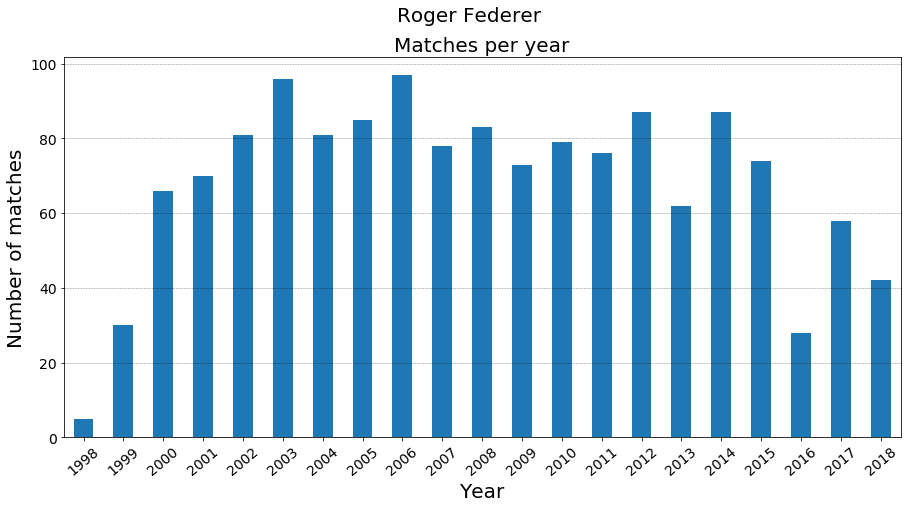

In [10]:
pd.DataFrame(matches_y, years).plot(kind='bar', figsize = (15,7), legend = False)
plt.title('Matches per year', fontsize=20)
plt.suptitle('Roger Federer',fontsize=20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize=14, rotation = 40)
plt.yticks(fontsize=14)
plt.ylabel('Number of matches', fontsize=20)

plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.5)
plt.show()

As with the rankings, there is a slight drop in matches played after 2006 and during 2013 and 2016, so some further investigation took place to find out if he suffered any injuries or whether these are inconsistencies in the dataset. There is a drop in matches played in some years. At the end of 2008, he suffered his first big back injury that was proven to reappear often in his career. His next serious injury was during 2013, also at his back. In 2016 Federer underwent knee surgery and his back problems also reappeared. These caused him to miss many important tournaments while taking a 6 month break. 2016 was the first season Federer did not win any titles since 2000, he had a significant drop in rankings and many analysts started to write him off. His comeback the next seaosn proved them wrong. Additionally, after Federer's 2017 comeback he followed a more conservative approach of playing much less matches per year. <br /> <br />
Some investigation on the [2]nd dataset is also carried below. The MCP doesn't include all official matches played, rather the ones that were the most interesting for analysis and that the crowd felt like they wanted to include in the dataset. Once again the data is cleaned to only include Federer's matches and also solve some inconsistencies, with regards to surface, that occured due to the data being crowd-sourced. Below are some basic statistics regarding the data[2], to understand what kind of matches are included. As it can be seen from the summary tables below, there are mostly final and semi-final matches, hard court surface matches (hard court season is generally longer) and mostly from the biggest tournaments on tour.

In [11]:
os.chdir('..')

In [12]:
match_char = pd.read_csv('charting-m-matches.csv', header = 0, engine='python',quoting=csv.QUOTE_NONE, index_col=0)
match_char['Date'] = pd.to_datetime(match_char['Date'])
#match_char['Surface'].value_counts()
clean_surface = {'Surface': {'hard':'Hard', 'Hard Court': 'Hard','Indoor hard': 'Hard', 'Indoor Hard':'Hard',
                             'Carpet (Hard)':'Hard', 'Hard Outdoor':'Hard', 'Hard Indoor':'Hard',
                             'Indoor Clay': 'Clay', 'Clay ': 'Clay', 'Court des Princes':'Clay'}}
match_char.replace(clean_surface, inplace=True)
#match_char['Surface'].value_counts() #now correct

print('Shape of male charted matches')
print(np.shape(match_char))
#match_char.head()


player_match_char = match_char.loc[(match_char['Player 1'] == player) | (match_char['Player 2'] == player)]
print('Shape of Federer charted matches')
print(np.shape(player_match_char))

print('Total of matches played by Federer - From [1]')
print(sum(matches_y))

print('Round data representation')
print(player_match_char['Round'].value_counts())
print('\n')
print('Surface data representation')
print(player_match_char['Surface'].value_counts())
print('\n')
print('Tournament data representation')
print(player_match_char['Tournament'].value_counts()[:10])
player_match_char.head()

#player_match_char['Date'].dt.year.value_counts()

Shape of male charted matches
(2285, 15)
Shape of Federer charted matches
(353, 15)
Total of matches played by Federer - From [1]
1438
Round data representation
F       150
SF       74
R16      36
QF       34
R32      24
RR       17
R64      11
R128      7
Name: Round, dtype: int64


Surface data representation
Hard      233
Grass      58
Clay       56
Carpet      6
Name: Surface, dtype: int64


Tournament data representation
Australian Open         31
Wimbledon               29
US Open                 24
Indian Wells Masters    21
Basel                   21
Halle                   20
Tour Finals             19
Dubai                   16
Cincinnati Masters      16
Rome Masters            14
Name: Tournament, dtype: int64


,Player 1,Player 2,Pl 1 hand,Pl 2 hand,Gender,Date,Tournament,Round,Time,Court,Surface,Umpire,Best of,Final TB?,Charted by
match_id,,,,,,,,,,,,,,,
20180903-M-US_Open-R16-Roger_Federer-John_Millman,Roger Federer,John Millman,R,R,M,2018-09-03,US Open,R16,21:10,Arthur Ashe,Hard,NaN,5.0,1.0,Palaver
20180901-M-US_Open-R32-Roger_Federer-Nick_Kyrgios,Roger Federer,Nick Kyrgios,R,R,M,2018-09-01,US Open,R32,14:30,Arthur Ashe,Hard,NaN,5.0,1.0,Palaver
20180830-M-US_Open-R64-Benoit_Paire-Roger_Federer,Benoit Paire,Roger Federer,R,R,M,2018-08-30,US Open,R64,15:00,Arthur Ashe,Hard,NaN,5.0,1.0,Palaver
20180828-M-US_Open-R128-Yoshihito_Nishioka-Roger_Federer,Yoshihito Nishioka,Roger Federer,L,R,M,2018-08-28,US Open,R128,17:15,Arthur Ashe,Hard,Damien Dumusois,5.0,1.0,Palaver
20180819-M-Cincinnati_Masters-F-Roger_Federer-Novak_Djokovic,Roger Federer,Novak Djokovic,R,R,M,2018-08-19,Cincinnati Masters,F,16:45,Center,Hard,Damien Dumusois,3.0,1.0,Palaver


The match_char dataset is the most important from the MCP as it contains the specific details of a match such as the two players' names, hands, date, tournament, round, surface, best of etc. Additionally it gives each match a unique id (match_id) that is used later to join the rest of the datasets also obtained from the MCP. 
From the total of 2285 male matches charted, 353 (~15%) were regarding Roger Federer. <br /> 
From dataset [1] it can also be seen that Federer has played 1438 matches during his carreer. Therefore this sample is quite small, but it can still be considered somewhat representative as it includes all the matches between Federer and the rest of the Big 4 (Nadal, Djokovic, Murray), all the 150 finals Federer has participated in through his carreer and most of his Grand Slam (Australian Open (Hard), Roland Garros (Clay), Wimbledon (Grass), US Open(Hard)) Semi-Finals. <br /> 
To get an idea of the representation of the matches per year in [2], the next bar chart is plotted. In addition, it also contains information regarding the number of matches played per surface.

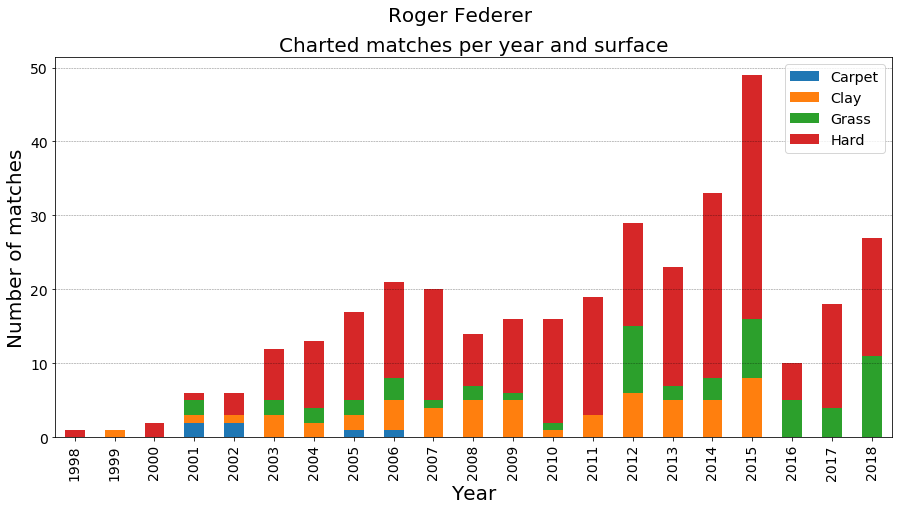

In [13]:
#See charted matches per year 
#group player matches by year 

by_year = player_match_char.groupby([player_match_char['Date'].dt.year, player_match_char['Surface']])
by_year.size().unstack().plot(kind='bar',stacked=True, figsize=(15,7))

plt.title('Charted matches per year and surface', fontsize=20)
plt.suptitle('Roger Federer',fontsize=20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number of matches', fontsize=20)
plt.legend(fontsize='x-large')

plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.5)

plt.show()


Taking into acount that mostly big matches were charted in this dataset, it is expected that the early years of Federer's career are not well represented. At the same time, it is seen that the most recent years are the most represented and this is probably due to the crowdsource inititive having started in 2013. Comparing this with the previous chart regarding matches played per year, the drops in 2013 and 2016 are consistent. On the other hand, the extreme peak in 2015 seems to be an inconsistency in the data, as looking at the official matches played, Federer actually played less matches than in the previous year.<br />

It is also important to mention that Carpet surface is only seen in the years before 2006 as in 2009 the Association decided to discontinoue its use. Additionally, two out of four main events of the year are on Hard courts, which means that most of the tournaments are played in these surfaces for preparation. It is therefore reasonable that these appear much more in the above chart. Moreover the Grass season is also the shortest. <br />

Another observtion is that during the past three seasons (2016-18), Federer did not participate in any Clay court events. This is his least succesfull surface and requires much preparation to adjsut so, with his team, they decided to take a break during that time. This helped him to play better during his favourite Grass season, and also enabled his long career to continoue. His 2016 injury was the main reason he skipped Clay season for the first time, and later on he continoued with this schedule. Additionally, it is not random that the past three years much less matches are charted. It is a result of a big injury scare in 2016 and adjustments Federer has taken due to his age in order to be active the longest possible. 

### Opponent Network Analysis

Through his career Federer has obviously had multiple opponents. To understand his career progression it is thus interesting to find out the opponents which he played the most. Which were the most repeating rivalries?
<br /><br />
The Top 10% of Federer's rivarlies are isolated below, along with the times each opponent has met Roger on a competitive match. A graph is then drawn to represent these. 

In [14]:
#exclude player(Roger Federer) from the list of all his opponents
players = [plr for plr in players if plr != player ]
playersdf = pd.DataFrame(np.array(players), columns=['Opponent'])


playersdf['Occur'] = playersdf.groupby('Opponent')['Opponent'].transform('size')
nodes = playersdf[['Opponent', 'Occur']].drop_duplicates()
print('In the past 20 years Federer has reportedly faced', len(nodes),'different opponents')
#sum(nodes['Occur']) #check #len(playersdf) == sum(nodes['Occur'])
p = np.percentile(nodes['Occur'], 90)
top_nodes= nodes.loc[nodes['Occur']>p]
top_nodes.insert(1, 'Player', player)
top_nodes= top_nodes[1:]
sortedtop = top_nodes.sort_values(by=['Occur'], ascending=False)
sortedtop

In the past 20 years Federer has reportedly faced 326 different opponents


,Opponent,Player,Occur
594,Novak Djokovic,Roger Federer,47
353,Rafael Nadal,Roger Federer,38
12,Lleyton Hewitt,Roger Federer,27
350,Tomas Berdych,Roger Federer,26
663,Juan Martin Del Potro,Roger Federer,25
501,Andy Murray,Roger Federer,25
157,Andy Roddick,Roger Federer,24
493,Stanislas Wawrinka,Roger Federer,24
204,Nikolay Davydenko,Roger Federer,21
53,Tommy Haas,Roger Federer,19


C:\Users\Asus\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\Users\Asus\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\Users\Asus\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\Users\Asus\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\Users\Asus\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\Users\Asus\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\Users\Asus\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\Users\Asus\Anacon

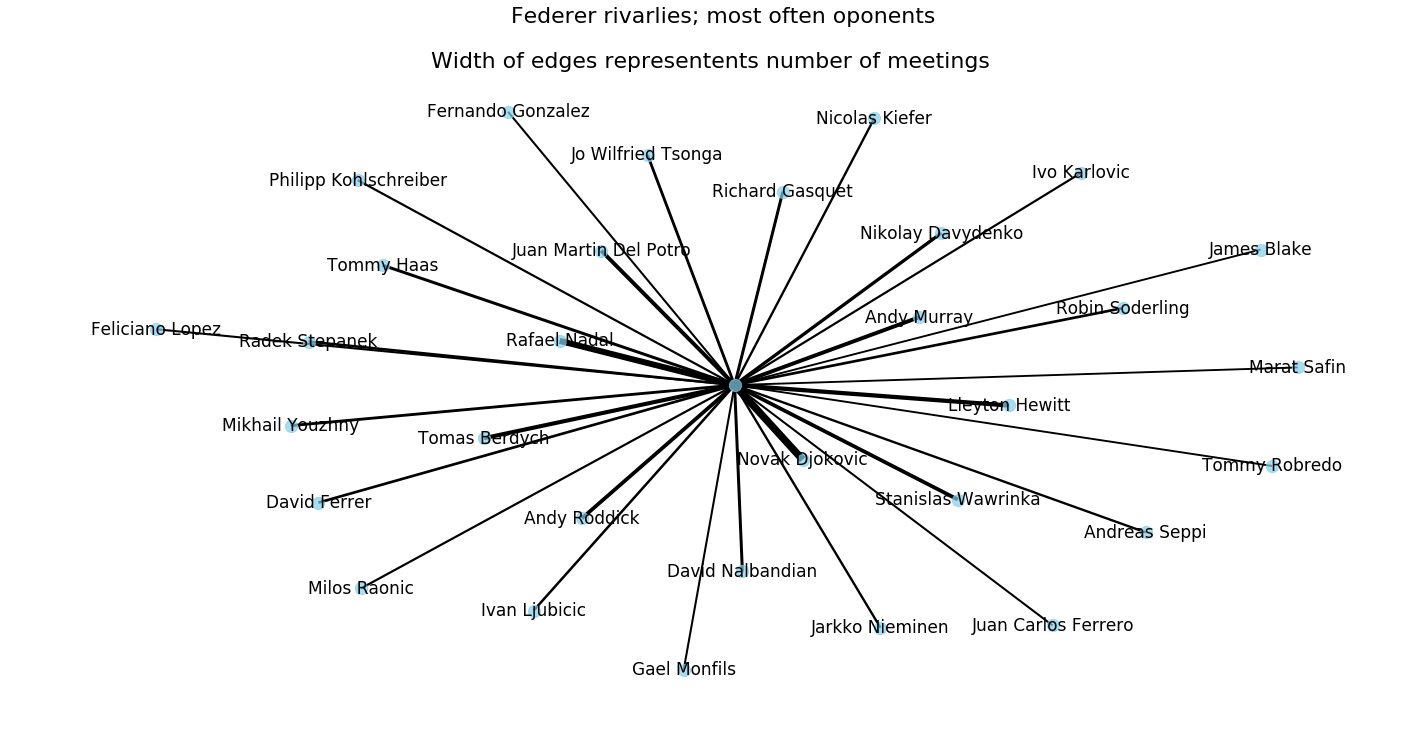

In [15]:
# importing graph visualization packages
import networkx as nx
plt.figure(figsize=(20,10))
###help from https://qxf2.com/blog/drawing-weighted-graphs-with-networkx/
G = nx.Graph()

for index, row in top_nodes.iterrows():
    G.add_edge(row['Opponent'], row['Player'] , weight=row['Occur'])

node_list = list(top_nodes['Opponent'])

all_weights = []
#Iterate through the graph nodes to gather all the weights
for (node1,node2,data) in G.edges(data=True):
    all_weights.append(data['weight']) #we'll use this when determining edge thickness
unique_weights = list(set(all_weights))

pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_color='skyblue',node_shape='.',node_size=600, alpha=0.7)
labels = {}
for node_name in node_list:
    labels[str(node_name)] =str(node_name)
nx.draw_networkx_labels(G,pos,labels,font_size=17)


#Plot the edges - one by one!
for weight in unique_weights:
    #Form a filtered list with just the weight you want to draw
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    #multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
    width = weight*len(node_list)*3.0/sum(all_weights)
    nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


plt.tight_layout()
plt.margins(x=0.1, y=0.1)
plt.axis('off')

plt.title('Federer rivarlies; most often oponents \n', fontsize=22)
plt.suptitle('Width of edges representents number of meetings', fontsize=22)


plt.show()


The above graph is a representation of the top 10 percent of Federer's rivarlies, i.e. the most common opponents he has faced through his career. The width of the edges represents the number of meetings Federer (central node) had with the relevant player. Most meetings are with Novak Djokovic, 46, and least with Safin, Robredo and Blake, 12. Other important rivarlies are Rafael Nadal, Lleyton Hewitt, Tomas Berdych, Andy Murray, Juan Martin Del Potro, Andy Roddick and Stan Wawrinka. <br /> 
The length of edges, distance of nodes from the centre, is calculated using Frucherman-Reingold force directed algorithm which achieves a clean result with least crossings. 


## How has Federer's game changed?
### Observe how different statistics have changed. 

What are Federer's key weapons? Anything in particular that made him this successful, and are there any adjustments necessary to keep the success for this long? Has his game truly changed over the years? <br /> 

#### Serve, Forehand, Backhand

To answer the above, charting-m-stats-Overview.csv was imported from the MCP[2]. As it can be seen this file included variables regarfing the two players points won, serves, returns, winners and unforced errors. Each match was represented by two rows (for the two players) regarding the total values of the variables as well as separate rows for each set, and each player. 

In [16]:
#Import file with match statistics - want Aces, Backhand & Forehand Winners
match_over = pd.read_csv('charting-m-stats-Overview.csv', header = 0, engine='python',quoting=csv.QUOTE_NONE, index_col=0)
print(np.shape(match_over))
match_over.describe() #sanity check - no negative values and min 0
match_over.head(10)

(16942, 19)


,player,set,serve_pts,aces,dfs,first_in,first_won,second_in,second_won,bk_pts,bp_saved,return_pts,return_pts_won,winners,winners_fh,winners_bh,unforced,unforced_fh,unforced_bh
match_id,,,,,,,,,,,,,,,,,,,
19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Borg-Jiri_Hrebec,1,Total,69,2,1,32,25,37,21,5,4,63,36,28,10,16,16,6,9
19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Borg-Jiri_Hrebec,2,Total,63,2,2,41,20,22,7,12,4,69,23,14,8,4,26,15,9
19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Borg-Jiri_Hrebec,1,1,26,2,0,15,10,11,6,2,1,18,13,10,3,5,6,2,4
19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Borg-Jiri_Hrebec,2,1,18,0,0,11,3,7,2,3,0,26,10,4,2,2,10,7,3
19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Borg-Jiri_Hrebec,1,2,24,0,0,10,9,14,8,1,1,26,10,9,3,6,6,2,4
19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Borg-Jiri_Hrebec,2,2,26,2,1,18,12,8,4,4,2,24,7,8,5,1,8,4,3
19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Borg-Jiri_Hrebec,1,3,19,0,1,7,6,12,7,2,2,19,13,9,4,5,4,2,1
19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Borg-Jiri_Hrebec,2,3,19,0,1,12,5,7,1,5,2,19,6,2,1,1,8,4,3
19780125-M-Pepsi_Grand_Slam-SF-Brian_Gottfried-Bjorn_Borg,1,Total,55,0,1,32,21,23,9,9,5,49,14,11,7,4,31,9,21


This file was further processed to include only mathces of Federer, by using the match_id variable and joining it with the match_char file encountered earlier, that was also pre-processed to only include Federer matches. Moreover, the row regarding Roger Federer and the Total of each variable per match were isolated. This is done since the focus of the analysis is on the total statistics in a single match. <br /> 
Checks are made along the way to establish that the right selection was indeed happening. <br /> 
The dataframe was updated to include only the information needed for the analysis; Ace Percentage, Forehand Winners, Backhand Winners, Best of match and Date. Best of match is needed as the winners are in absolute terms and hence expected to be more in best of 5 matches compared to best of 3, since they last longer. An example of the finalised dataframe can be found below.

In [40]:
player_match_over = player_match_char.join(match_over, on='match_id' , how='left')
player_match_over

player_match_over['player'] = player_match_over['player'].fillna(0.0).astype(int)

player_match_over = player_match_over.loc[((player_match_over['Player 1'] == player) & (player_match_over['player'] == 1))
                       | ((player_match_over['Player 2'] == player) & (player_match_over['player'] == 2))]

#print(np.shape(player_match_over)) #row for each set + total of each match
#will only focus on Total statistics for a match
player_match_over = player_match_over.loc[player_match_over['set'] == 'Total']

print(np.shape(player_match_over)) #just missing 3 matches from the original 353
print(list(player_match_over.columns.values))

player_match_over[['Player 1','Player 2', 'player', 'set']].head(10) #correct selection
#every row is regarding Federer

player_match_over = player_match_over[['aces', 'serve_pts','winners_fh', 'winners_bh', 'Best of', 'Date' ]]
player_match_over['ace_perc'] = player_match_over['aces']/player_match_over['serve_pts'] *100
player_match_over = player_match_over[['ace_perc','winners_fh', 'winners_bh', 'Best of', 'Date' ]]
player_match_over.head()
#player_match_over['Best of'].value_counts()

(350, 34)
['Player 1', 'Player 2', 'Pl 1 hand', 'Pl 2 hand', 'Gender', 'Date', 'Tournament', 'Round', 'Time', 'Court', 'Surface', 'Umpire', 'Best of', 'Final TB?', 'Charted by', 'player', 'set', 'serve_pts', 'aces', 'dfs', 'first_in', 'first_won', 'second_in', 'second_won', 'bk_pts', 'bp_saved', 'return_pts', 'return_pts_won', 'winners', 'winners_fh', 'winners_bh', 'unforced', 'unforced_fh', 'unforced_bh']


,ace_perc,winners_fh,winners_bh,Best of,Date
match_id,,,,,
20180903-M-US_Open-R16-Roger_Federer-John_Millman,6.358382,32.0,14.0,5.0,2018-09-03
20180901-M-US_Open-R32-Roger_Federer-Nick_Kyrgios,17.391304,19.0,16.0,5.0,2018-09-01
20180830-M-US_Open-R64-Benoit_Paire-Roger_Federer,5.263158,13.0,7.0,5.0,2018-08-30
20180828-M-US_Open-R128-Yoshihito_Nishioka-Roger_Federer,17.073171,24.0,15.0,5.0,2018-08-28
20180819-M-Cincinnati_Masters-F-Roger_Federer-Novak_Djokovic,14.285714,7.0,4.0,3.0,2018-08-19


The three most important weapons tennis players have are their Service, their Forehand and their Backhand. Below an observation is made of how successfull these have been for Federer by examining his ace percentage as well as the average number of winners he performed in matches of a particular year. The lines on the bar charts represent the error/standard deviation of each average, i.e. how stable Federer's performance was at the particular time. For the bars that an error line is not visible it is because there is just one sample from that particular group (or multiple with exactly same value which is highly unlikely), and are thus not very trustworthy. 

In [42]:
# acep = player_match_over.pivot_table(index=player_match_over['Date'].dt.year, columns='Best of', values='ace_perc',
#                 aggfunc=['mean', 'std'], fill_value=0)
# acep['mean'].plot.bar(yerr = acep['std'],figsize=(15,7),stacked=False, color=['#00BEC5', '#F9746A'])
# plt.ylabel('Average Ace Percentage', fontsize = 18)
# plt.xlabel('Year', fontsize=18)
# plt.xticks(rotation = 40)
# #plt.ylim(top=40)
# plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.5)

# plt.suptitle("Average Ace%, Forehand and Backhand winners per year and per 'best of' matches", fontsize = 18 )

# fhwin = player_match_over.pivot_table(index=player_match_over['Date'].dt.year, columns='Best of', values='winners_fh',
#                 aggfunc=['mean', 'std'], fill_value=0)
# fhwin['mean'].plot.bar(yerr = acep['std'],figsize=(15,7),stacked=False, color=['#00BEC5', '#F9746A'])
# plt.ylabel('Average Forehand Winners', fontsize = 18)
# plt.xlabel('Year', fontsize=18)
# plt.xticks(rotation = 40)
# plt.ylim(top=40)
# plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.5)

# bhwin = player_match_over.pivot_table(index=player_match_over['Date'].dt.year, columns='Best of', values='winners_bh',
#                 aggfunc=['mean', 'std'], fill_value=0)
# bhwin['mean'].plot.bar(yerr = acep['std'],figsize=(15,7),stacked=False,color=['#00BEC5', '#F9746A'])
# plt.ylabel('Average Backhand Winners', fontsize = 18)
# plt.xlabel('Year', fontsize=18)
# plt.xticks(rotation = 40)
# plt.ylim(top=40)
# plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.5)

# plt.show()

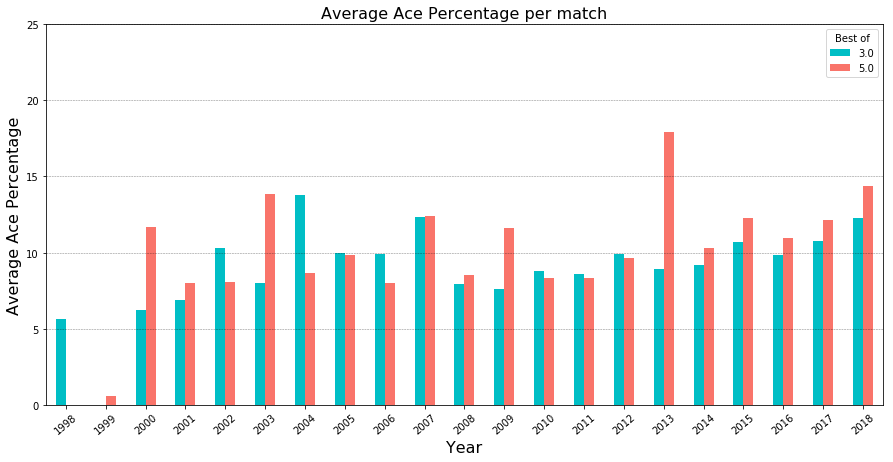

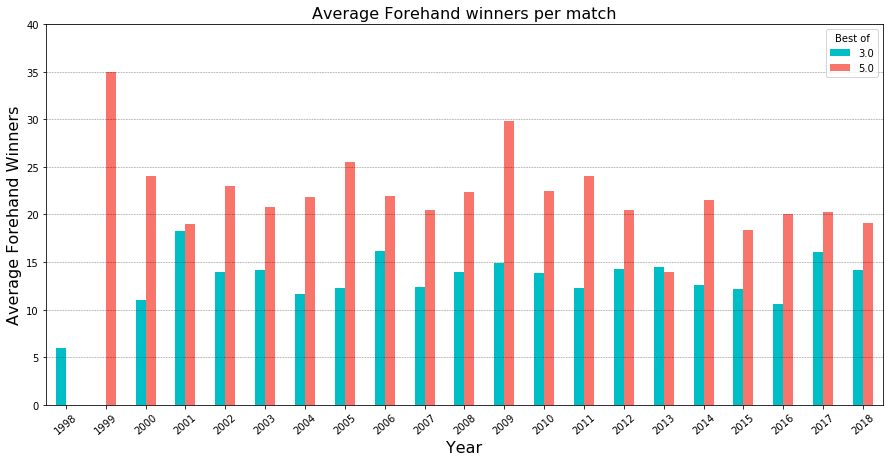

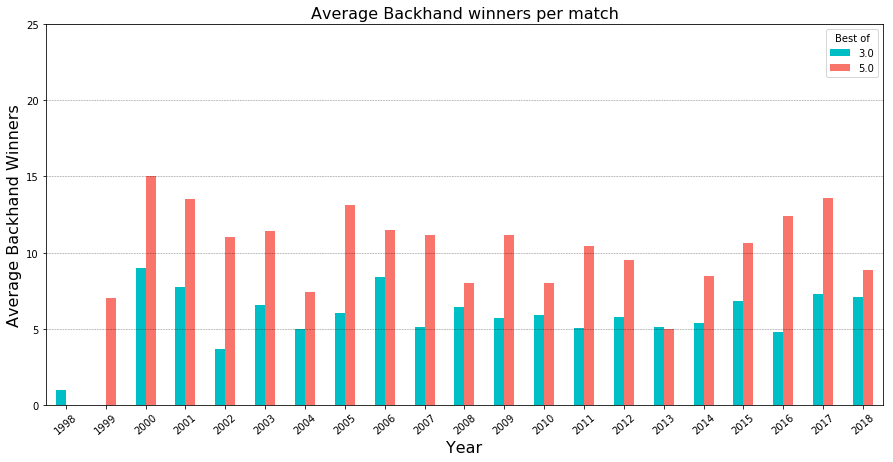

In [41]:
acep = player_match_over.pivot_table(index=player_match_over['Date'].dt.year, columns='Best of', values='ace_perc',
                aggfunc=['mean', 'std'], fill_value=0)
acep['mean'].plot.bar(figsize=(15,7),stacked=False, color=['#00BEC5', '#F9746A'])
plt.ylabel('Average Ace Percentage', fontsize = 16)
plt.xlabel('Year', fontsize=16)
plt.title("Average Ace Percentage per match", fontsize = 16 )
plt.xticks(rotation = 40)
plt.ylim(top=25)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.5)

plt.savefig('ace.png', bbox_inches='tight')
plt.show()

fhwin = player_match_over.pivot_table(index=player_match_over['Date'].dt.year, columns='Best of', values='winners_fh',
                aggfunc=['mean', 'std'], fill_value=0)
fhwin['mean'].plot.bar(figsize=(15,7),stacked=False, color=['#00BEC5', '#F9746A'])
plt.ylabel('Average Forehand Winners', fontsize = 16)
plt.xlabel('Year', fontsize=16)
plt.title("Average Forehand winners per match", fontsize = 16 )
plt.xticks(rotation = 40)
plt.ylim(top=40)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.5)

plt.savefig('forehand.png', bbox_inches='tight')
plt.show()

bhwin = player_match_over.pivot_table(index=player_match_over['Date'].dt.year, columns='Best of', values='winners_bh',
                aggfunc=['mean', 'std'], fill_value=0)
bhwin['mean'].plot.bar(figsize=(15,7),stacked=False,color=['#00BEC5', '#F9746A'])
plt.ylabel('Average Backhand Winners', fontsize = 16)
plt.xlabel('Year', fontsize=16)
plt.title("Average Backhand winners per match", fontsize = 16 )
plt.xticks(rotation = 40)
plt.ylim(top=25)
#plt.ylim(top=40)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.5)

plt.savefig('backhand.png', bbox_inches='tight')
plt.show()

The three bar charts above demonstrate respectively the average ace percentage, average forehand and backhand winners in a match, separated by year and best of. The axes for forehand and backhand are kept fixed for the ease of comparability. The 21 years are also kept separate, and not following the [SRF Data team](https://www.srf.ch/static/srf-data/data/2018/federer/en.html#/en) 's categorisation (discussed earlier), as it was seen that the similarities in the statistics examined were not strong enough within each group. The differences in mean between the years led to the decision to analyse each year separately. <br /> 

Federer's ace percentage has remained at about the same level throughout his career, about 10%, and relatively stable each year (low error). Usually there is no significant difference between best of 3 or 5 matches. As by the data, Federer's serve reached it's peack in 2018 (close to 15%), while also having one of the highest ace percentages in 2017. This is an indication that after his comeback Federer has tried to keep points shorter by working on his serve. Other notable years where he exceeded the 10% benchmark for aces per serve were 2007 and 2015. To the contrary, in the period of 2008-2011 he had some of his worse periods regarding his serve, probably resulting from his back injury in 2008, and it was the time he also struggled to remain at No.1. <br /> 

Federer's forehand has been particularly stable within the years, with some exceptions of course. In best of 5 matches his forehand winners were ranging from just below 20 up to 30 and during best of 3 from around 10-15. It is noteable that even at the start of his career (~2002) his forehand winners were about at the same level as in his peak years. A big change in best of 3 matches occurd after 2016, when suddendly Federer achieved average forehand winners above 15, which had only happened 10 years ago. <br /> 

Regarding Federer's backhand, it is obvious, that compared to his forehand, it was not his strong weapon. The backhand has been very unstable, and the winners per match are usually even less than half of the forehand ones. Especially in best of 3 set matches, Federer performed badly, usually having less than 5 winners. In his peak years he definitely performed much more winners than in his decline, and he returned to that level in 2016-17. In 2018 his performance in Grand Slams has significantly decreased though. <br /> 

Below, a scatterplot demonstrating the tradeoff between Federer's forehand and backhand winners is also drawn. The different colours display the aforementioned categorisation.

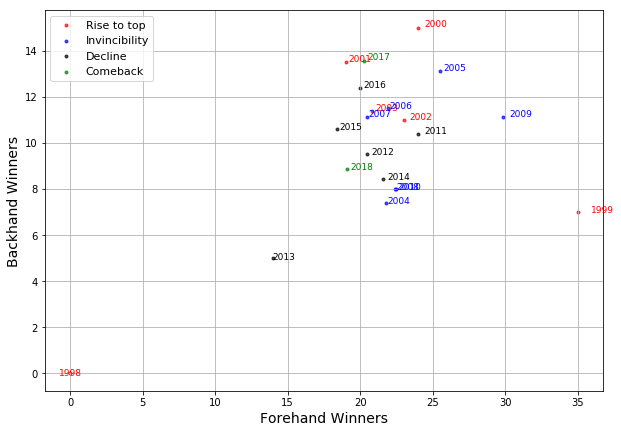

In [20]:
fig,ax = plt.subplots(1, 1, figsize=(10,7))

plt.scatter(fhwin.iloc[:6,1],bhwin.iloc[:6,1],c='r', label='Rise to top',alpha= .7,marker = ".")
plt.scatter(fhwin.iloc[6:13,1],bhwin.iloc[6:13,1],c='b', label='Invincibility',alpha= .7,marker = ".")
plt.scatter(fhwin.iloc[13:19,1],bhwin.iloc[13:19,1],c='black', label='Decline', alpha= .7,marker = ".")
plt.scatter(fhwin.iloc[19:,1],bhwin.iloc[19:,1],c='g', label='Comeback',alpha= .7,marker = ".")

labels = list(fhwin.index.values)

for i in range(6): 
    plt.text(fhwin.iloc[i,1]* 1.05, bhwin.iloc[i,1] * 1.01, labels[i], color='r', ha='center', va='center', fontsize=9)
for i in range(6,13):
    plt.text(fhwin.iloc[i,1]* 1.04, bhwin.iloc[i,1] * 1.01, labels[i], color='b', ha='center', va='center',fontsize=9)
for i in range(13,19):    
    plt.text(fhwin.iloc[i,1]* 1.05, bhwin.iloc[i,1] * 1.01, labels[i], color='black', ha='center', va='center',fontsize=9)
for i in range(19,21):    
    plt.text(fhwin.iloc[i,1]* 1.05, bhwin.iloc[i,1] * 1.01, labels[i], color='g', ha='center', va='center',fontsize=9)

plt.xlabel('Forehand Winners', fontsize=14)
plt.ylabel('Backhand Winners', fontsize=14)
plt.legend(loc = 'upper left' ,fontsize=11)
plt.grid()
plt.show()

From the above scatter plot, a conclusion can be drawn on whether there is a correlation between the backhand and forehand performance. It should be borne in mind that 1998-2000 and 2013 (just one best of 5 sets match) do not have many matches charted and thus don't offer very reliable data. <br /> 
The rest of the points cover a relatively small range on both axes and there doesn't seem to be any correaltion with respect to the year cotegories. 

#### Net Points

Federer is also famous for his net game. In the case that Federer is looking to cut the points shorter as he grows older this is expected to be seen in the net points won. For this purpose, from the MCP [2], the charting-m-stats-NetPoints.csv file has been used. This is dedicated to statistics regarding Net Points. A head of this dataset is shown below. For each match and player there are statistics regarding Net Points, Approaches, Net Point Rallies and Approach Rallies. In this analysis focus will be given on Net Points alone. 

In [21]:
#csv file is not correctly formed 
#more columns (commas) than actual headers at the end of a row - they are all empty
#manually extract column names to solve the problem
clmnames = ['match_id','player','row','net_pts','pts_won','net_winner','induced_forced','net_unforced','passed_at_net','passing_shot_induced_forced','total_shots']
match_net = pd.read_csv('charting-m-stats-NetPoints.csv', header = 0, engine='python',quoting=csv.QUOTE_NONE, index_col=0, names=clmnames[1:], usecols=clmnames[1:])
match_net.index.name = clmnames[0]
print(np.shape(match_net))
match_net.head()
#match_net.describe() #sanity check - no negative values and min 0

(17968, 10)


,player,row,net_pts,pts_won,net_winner,induced_forced,net_unforced,passed_at_net,passing_shot_induced_forced,total_shots
match_id,,,,,,,,,,
19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Borg-Jiri_Hrebec,1,NetPoints,60,42,18,10,8,4,2,309
19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Borg-Jiri_Hrebec,1,Approach,55,39,16,9,6,4,2,284
19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Borg-Jiri_Hrebec,1,NetPointsRallies,30,19,10,5,6,2,2,224
19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Borg-Jiri_Hrebec,1,ApproachRallies,25,16,8,4,4,2,2,199
19751219-M-Davis_Cup_World_Group_F-RR-Bjorn_Borg-Jiri_Hrebec,2,NetPoints,41,21,6,10,5,10,3,250


The data is again joined with the 'base' data (match_char) on match_id and processed to only include Federer matches and the relevant 'row'. Additionally, a new variable was constructed from the total net points (net_pts) and the points won (pts_won), that is the net point winning percentage (net_win_perc), which eventually is the most important information to analyse. 

(2678, 25)
(1340, 25)


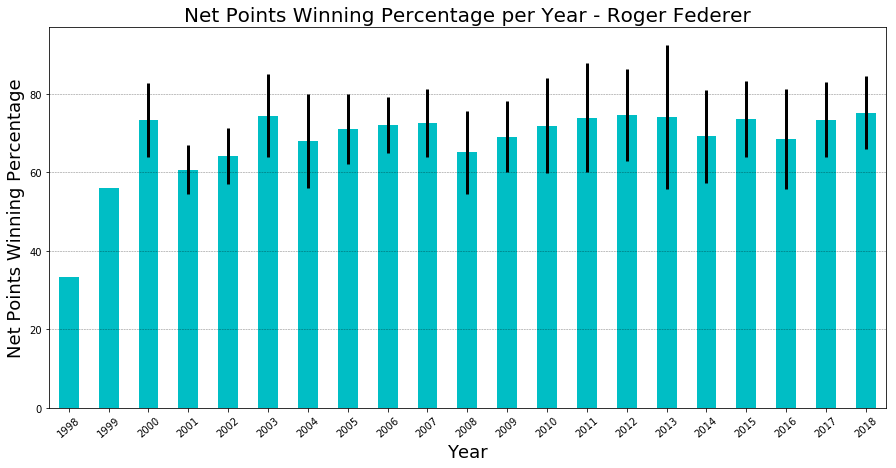

In [22]:
player_match_net = player_match_char.join(match_net, on='match_id' , how='left')
print(np.shape(player_match_net))
player_match_net
#player_match_net['player'] = player_match_over['player'].fillna(0.0).astype(int)

#form/isolate data
player_match_net = player_match_net.loc[((player_match_net['Player 1'] == player) & (player_match_net['player'] == 1))
                       | ((player_match_net['Player 2'] == player) & (player_match_net['player'] == 2))]
print(np.shape(player_match_net)) #exactly half => right 

player_match_net = player_match_net.loc[player_match_net['row'] == 'NetPoints']
player_match_net['net_win_perc'] = player_match_net['pts_won']/player_match_net['net_pts'] *100
player_match_net.columns
player_match_net = player_match_net[['net_pts','net_win_perc', 'Best of', 'Date' ]]

#plot
netp = player_match_net.pivot_table(index=player_match_net['Date'].dt.year, values=['net_win_perc'],
                aggfunc=['mean', 'std'], fill_value=0)
netp['mean'].plot.bar(yerr = netp['std'],figsize=(15,7),stacked=False, color=['#00BEC5'], legend=False)
plt.title('Net Points Winning Percentage per Year - Roger Federer', fontsize = 20)
plt.ylabel('Net Points Winning Percentage', fontsize = 18)
plt.xlabel('Year', fontsize=18)
plt.xticks(rotation = 40)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.5)
plt.show()

Once again this is a quite stable performance, around the levels of 70% net points won. No year particularly stands out as the best though Federer had some good times at the start of his career in 2000 and 2003. He didn't have his best results during his peak, and his net success particularly dropped in 2008-09. The claim that Federer, in an effort to shorten points in the last two years, has been coming forward more and winning more points from the net, does not seem to hold. It is just the case that he has regained his skilss after 2016 to his usual old self.

## Can he keep winning? 

Every year some analyst around the globe claims that that year is the last on for Roger Federer. The retirement talk has not stopped since his first drop in rankings in 2013. But really for how long can he keep strong? <br /> <br />  The data used here comes from [1] and the pre-processed mentioned earlier. 

### Winning Percentage and Matches Played

Below is a scatter plot demonstrating Federer's matches played per year against his winning percentage. 

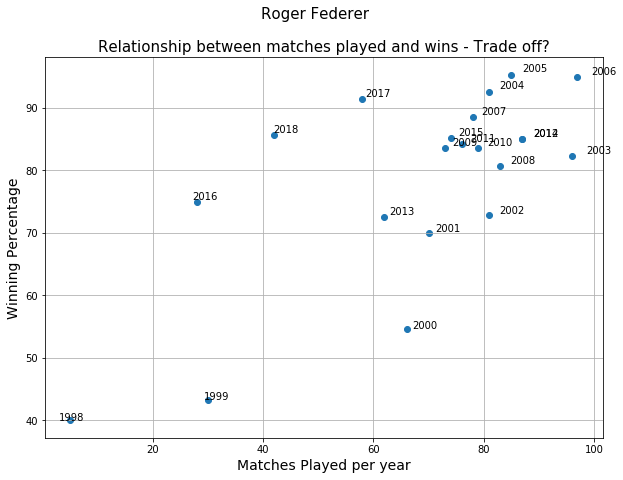

In [23]:
fig,ax = plt.subplots(1, 1, figsize=(10,7))
plt.scatter(matches_y,pwin_y)
for i in range(len(matches_y)): 
    plt.text(matches_y[i]* 1.05, pwin_y[i] * 1.01, years[i], color='black', ha='center', va='center', fontsize=10)
plt.xlabel('Matches Played per year', fontsize=14)
plt.ylabel('Winning Percentage', fontsize=14)
plt.title('Relationship between matches played and wins - Trade off?', fontsize=15)
plt.suptitle('Roger Federer', fontsize=15)

plt.grid()
plt.show()

#plt.bar(years, pwin_y) #not varying much, not that interesting

It is firstly impressive to note that during the start of his Invincibility years (2004-2006) his performance was almost perfect, reaching even 95% success while playing a very high number of matches per year (~90). In general it seemes like the more matches he played, the higher was his winning percentage. Some years though stand out; the past three seasons. In 2016 he played extremely few matches, and not very succesfully (compared to his previous performance). As mentioned beofore, he skipped about half of the 2016 season. It is indeed the case that since in 2017 and 2018 he skipped clay season, he obviously played less matches than he used to. This did not compromise his success rate though as he continoued with a winning percentage in the range of 85-90%. One could say that he has found the balance between matches played and winning percentage, as during his healthy years he always managed to keep it high. 

### Modelling
For predictions on Federer's performance in the next year, data is used from [1] but only for the last two years, 2017-2018. This is done as these two years are considered to be more representative for the coming year, given Federer stays healthy. Additionally, it has been proven above that the past two years had been different than the rest and this shouldn't be ignored. <br />
These two files are concatinated and processed together. The variables in these files are as discussed earlier. For the purpose of modelling, the aim is to predict the indicator variable player_win, taking value of 1 if Federer wins and 0 otherwise. Since the data are in terms of winner and loser, modelling becomes hard. For this reason, absolute values are created; difference in age (dage), difference in ranking (drank), difference in ranking points (drank_points). An indicator, dhand, is added that takes value 1 if players have same hand and 0 otherwise. In the case of Federer (Right-handed) it means that if he plays a Lefty (e.g. Rafael Nadal), dhand will be 0. <br />
And since the focus here is on prediction, match statistics that are unavailable before the beginning of a match cannot be used. The interesting variables are selected and the head of the altered dataset can be found below. 

In [24]:
# libraries for model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score, accuracy_score

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
results_18 = pd.read_csv('atp_matches_2018_results.csv') #data up to end of September - not 100% complete yet
results_17 = pd.read_csv('atp_matches_2017_results.csv')
results_18['year'] = 2018
results_17['year'] = 2017
results_18.describe() #some missing value but mostly not on important variables

print(list(results_17.columns))

tog = [results_17, results_18]

player_res_tog = pd.concat(tog)

print(np.shape(results_17))
print(np.shape(results_18))
print(np.shape(player_res_tog)) #correct concatenation


#some variable selection - exclude anything not interesting

#here prediction is more interesting
#so cannot use match stats that are unavailable before match
#they are interesting for inference - e.g.how much does an extra winner increase the probability of winning the match
#or an extra minute etc

player_res_tog = player_res_tog[['surface', 'draw_size', 'tourney_level','winner_name', 'winner_hand',
            'winner_age','winner_rank', 'winner_rank_points','loser_name', 'loser_hand', 'loser_age',
            'loser_rank', 'loser_rank_points', 'best_of','round','year']]
# player_res_tog['best_of'].value_counts()
# player_res_tog['surface'].value_counts()
# player_res_tog['draw_size'].value_counts()

player_res_tog = player_res_tog.loc[(player_res_tog['winner_name'] == player) | (player_res_tog['loser_name'] == player)]


player_res_tog['player_win'] = player_res_tog.apply(lambda row: Player_win (row), axis=1)

#Since the data is given in the form of winner and loser it is not very useful in the modelling 
#this way try to remove that effect to make modelling more intuitive
player_res_tog['drank'] = abs(player_res_tog['winner_rank'] - player_res_tog['loser_rank'])
player_res_tog['drank_points'] = abs(player_res_tog['winner_rank_points'] - player_res_tog['loser_rank_points'])
player_res_tog['dage'] = abs(player_res_tog['winner_age'] - player_res_tog['loser_age'])

def hand(row):
    if (row['winner_hand'] == row['loser_hand']):
        return 1
    else: 
        return 0

player_res_tog['dhand'] = player_res_tog.apply(lambda row: hand (row), axis=1)

player_res_tog = player_res_tog[['surface', 'draw_size', 'best_of','round','year','drank', 
                                'drank_points', 'dage' ,'dhand','player_win']]

print(player_res_tog.shape)
player_res_tog.head(10)

['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'year']
(2886, 50)
(2494, 50)
(5380, 50)
(100, 10)


,surface,draw_size,best_of,round,year,drank,drank_points,dage,dhand,player_win
150,Hard,128,5,R128,2017,283.0,1816.0,0.213552,0,1
208,Hard,128,5,R64,2017,183.0,1706.0,14.537988,1,1
237,Hard,128,5,R32,2017,7.0,1080.0,4.109514,1,1
252,Hard,128,5,R16,2017,12.0,3030.0,8.391513,1,1
259,Hard,128,5,QF,2017,33.0,1086.0,6.036961,0,1
263,Hard,128,5,SF,2017,13.0,3175.0,3.635866,1,1
265,Hard,128,5,F,2017,8.0,1215.0,4.818617,0,1
561,Hard,32,3,R16,2017,106.0,2767.0,8.750171,1,0
571,Hard,32,3,R32,2017,29.0,2220.0,7.748118,1,1
610,Hard,128,3,F,2017,7.0,1890.0,3.635866,1,1


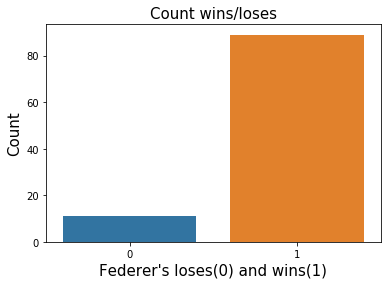

In [26]:
sns.countplot(x='player_win', data = player_res_tog)
plt.title('Count wins/loses', fontsize=15)
plt.xlabel("Federer's loses(0) and wins(1)", fontsize=15)
plt.ylabel("Count", fontsize=15)

plt.show()

Considering that Federer has such high winning percentages, it is obvious that the data is going to be unbalanced (as shown above) and thus binary classification needs adjustments to solve the under-representation of loosing matches. Otherwise the classifier, with a high accuracy, will always predict Federer as the winner. However appealing that might be for a Federer fan it is actually not accurate. It is interesting to see though what is common between the matches Federer won and lost in a table.

In [27]:
#player_res_tog.describe()
pl_win = player_res_tog.groupby('player_win').mean()
pl_win
#player_res_tog.head()
#for 0 - know Federer was loser 
#for 1 - winner

,draw_size,best_of,year,drank,drank_points,dage,dhand
player_win,,,,,,,
0,79.272727,3.545455,2017.545455,65.454545,5487.727273,9.066517,1.000000
1,88.719101,3.719101,2017.404494,45.146067,5299.348315,7.905436,0.820225


#### Observations
 * The difference in age (dage) when Federer wins is smaller than when he loses - indicating he is probably losing from much younger players - but it is not that big
 * Federer tend to lose more from lower ranked players (drank and dpoints) - strange
 * He mostly won left handed players in the past two years (indeed these are very few though)
 
 
 
To build a model it is necessary to create dummies for categorical variables. This is done below. N.B. In order to be able to predict 2019 matches, the year needs to stay a continous variable under the assumption that performance changes linearly.

['year', 'drank', 'drank_points', 'dage', 'dhand', 'player_win', 'surface_Hard', 'draw_size_32', 'draw_size_64', 'draw_size_128', 'best_of_5', 'round_QF', 'round_R128', 'round_R16', 'round_R32', 'round_R64', 'round_RR', 'round_SF']


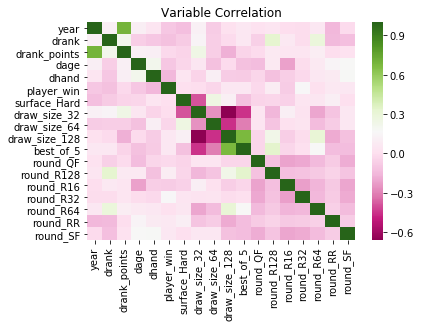

In [28]:
#help from https://datascienceplus.com/building-a-logistic-regression-in-python-step-by-step/
#create dummy variables to easily use the Logistic Regression module of sklearn
player_res_tog1 = pd.get_dummies(player_res_tog, columns =['surface', 'draw_size','best_of','round'], drop_first= True)
print(player_res_tog1.columns.values.tolist())

sns.heatmap(player_res_tog1.corr(), cmap="PiYG")
plt.title('Variable Correlation')
plt.show()

HeatMap looks relatively good - some multicolinearity shown between the draw size categories and the best of. This is relatively reasonable as best of 5 matches are always Grand Slams with 128 player draws

In [29]:
y = player_res_tog1.player_win
X = player_res_tog1.drop(['player_win'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

The SMOT (Synthetic Minority Oversampling Technique) algorithm is used to create more loss datapoint samples. <br />
Moreover, the analysis is continoued with a balanced dataset in terms of wins and losses.

In [30]:
#!pip install imblearn

In [31]:
#help from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
columns = X_train.columns
#os_X,os_y = os.fit_sample(np.array(X_train), np.array(y_train))
os_X,os_y = os.fit_sample(X_train, y_train)


os_X = pd.DataFrame(data=os_X, columns=columns)
os_y = pd.DataFrame(data=os_y, columns=['player_win'])

X_train1, X_test1, y_train1, y_test1 = train_test_split(os_X, os_y, test_size=0.3, random_state=0)

print("Length of oversampled data is ",len(os_X))
print("Number of loses in oversampled data",len(os_y[os_y['player_win']==0]))
print("Number of wins",len(os_y[os_y['player_win']==1]))
print("Proportion of loses in oversampled data is ",len(os_y[os_y['player_win']==0])/len(os_X))
print("Proportion of wins in oversampled data is ",len(os_y[os_y['player_win']==1])/len(os_X))

Length of oversampled data is  128
Number of loses in oversampled data 64
Number of wins 64
Proportion of loses in oversampled data is  0.5
Proportion of wins in oversampled data is  0.5


In [32]:
classifier_names = ["Logistic Regression","Nearest Neighbors", "Random Forest"]
 
classifiers = [LogisticRegression(solver='lbfgs', max_iter=400),
               KNeighborsClassifier(4), #actually found 4 givs higher accuracy - trial & error
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]

pred_prob = {}
pred = {}

# fit individual classifiers
for name, classifier in zip(classifier_names, classifiers):
    np.random.seed(100)
    classifier.fit(X_train1,y_train1.values.ravel())
    pred_prob[name] = classifier.predict_proba(X_test1)[:,1]
    pred[name] = classifier.predict(X_test1)
   # pred[name] = np.where(pred_prob[name] >= 0.5, 1, 0)

#all work well
# print(pred_prob['Logistic Regression'])
# print(pred_prob['Nearest Neighbors'])
# print(pred_prob['Random Forest'])

# #print(pred)
# #print(y_test1)

def get_iterable(x):
    if isinstance(x, list):
        return x
    else:
        return [x]
    
def print_accuracy(y_test, y_pred, names):
    names = get_iterable(names)
    for name in names:
        acc = accuracy_score(y_test, y_pred[name])
        print(name+' acc: %0.5f' % acc)
        
def print_cmf(y_test, y_pred, names):
    names = get_iterable(names)
    for name in names:
        cfm = confusion_matrix(y_test, y_pred[name])
        print(name)
        print(cfm)
print('The accuracy of the three methods is:')        
print_accuracy(y_test1, pred, classifier_names)
print('\nBelow is the confusion matrix for each method')
print_cmf(y_test1, pred, classifier_names)

# def print_tptn(y_test, y_pred, names):
#     names = get_iterable(names)
#     for name in names:
#         tn,fp,fn,tp = confusion_matrix(y_test, y_pred[name]).ravel()
#         print(name)
#         print('(tn,fp,fn,tp)')
#         print((tn,fp,fn,tp))
        
# print_tptn(y_test1, pred, classifier_names)
# print(pred['Nearest Neighbors'])
# print(len(pred['Nearest Neighbors']))
# print(sum(pred['Nearest Neighbors']))

The accuracy of the three methods is:
Logistic Regression acc: 0.74359
Nearest Neighbors acc: 0.76923
Random Forest acc: 0.92308

Below is the confusion matrix for each method
Logistic Regression
[[15  4]
 [ 6 14]]
Nearest Neighbors
[[18  1]
 [ 8 12]]
Random Forest
[[17  2]
 [ 1 19]]


### Next year predictions

Taking only the test accuracy of the classification into account, Random Forest performs best, but with a worryingly high score. Considering the purpose of the model, a balanced confusion matrix is actually prefered. Decision is made to choose the k-NN model with k=4. This is a model that overestimates losses, but it is better to be prepared for a possible threat than not.  Below are some possible opponents of Roger Federer and his winning probability is going to be calculated using the chosen model from above. To increase the sample size, the whole sample is used, not just the training.

In [33]:
knn = KNeighborsClassifier(4).fit(os_X, os_y.values.ravel())

In [34]:

type(X_test1)
print(X_test1.columns.values.tolist(), '\n')
#['year', 'drank', 'drank_points', 'dage', 'dhand', 'surface_Hard', 'draw_size_32', 'draw_size_64', 'draw_size_128', 
#'best_of_5', 'round_QF', 'round_R128', 'round_R16', 'round_R32', 'round_R64', 'round_RR', 'round_SF']

print('young and high in rankings - hard court - middle round')
print(knn.predict_proba([[2019, 4, 2500, 15, 1, 1, 0,0,1,1,0,0,0,1,0,0,0]])[:,1],'\n') 

print('young and low in rankings - hard court - middle round')
print(knn.predict_proba([[2019, 40, 5500, 15, 1, 1, 0,0,1,1,0,0,0,1,0,0,0]])[:,1],'\n') 

print('young and high in rankings - grass court - middle round')
print(knn.predict_proba([[2019, 4, 2500, 15, 1, 0, 0,0,1,1,0,0,0,1,0,0,0]])[:,1],'\n') 

print('young and low in rankings - grass court - middle round')
print(knn.predict_proba([[2019, 40, 5500, 15, 1, 0, 0,0,1,1,0,0,0,1,0,0,0]])[:,1],'\n') 


print('close age and high in rankings - hard court - high round')
print(knn.predict_proba([[2019, 4, 2500, 3, 1, 1, 0,0,1,1,0,0,0,0,0,0,1]])[:,1],'\n') 

print('close age and high in rankings - hard court - low round')
print(knn.predict_proba([[2019, 4, 2500, 3, 1, 1, 0,0,1,1,0,0,0,0,1,0,0]])[:,1],'\n') 

print('close age and high in rankings - grass court - high round')
print(knn.predict_proba([[2019, 4, 2500, 3, 1, 0, 0,0,1,1,0,0,0,0,0,0,1]])[:,1],'\n') 

print('close age and high in rankings - grass court - low round')
print(knn.predict_proba([[2019, 4, 2500, 3, 1, 0, 0,0,1,1,0,0,0,0,1,0,0]])[:,1],'\n') 

['year', 'drank', 'drank_points', 'dage', 'dhand', 'surface_Hard', 'draw_size_32', 'draw_size_64', 'draw_size_128', 'best_of_5', 'round_QF', 'round_R128', 'round_R16', 'round_R32', 'round_R64', 'round_RR', 'round_SF'] 

young and high in rankings - hard court - middle round
[1.] 

young and low in rankings - hard court - middle round
[0.25] 

young and high in rankings - grass court - middle round
[1.] 

young and low in rankings - grass court - middle round
[0.25] 

close age and high in rankings - hard court - high round
[1.] 

close age and high in rankings - hard court - low round
[1.] 

close age and high in rankings - grass court - high round
[1.] 

close age and high in rankings - grass court - low round
[1.] 



#### Update: Comparison with reality
Some more predictions based on mathces that already took place

In [35]:
#['year', 'drank', 'drank_points', 'dage', 'dhand', 'surface_Hard', 'draw_size_32', 'draw_size_64', 'draw_size_128', 
#'best_of_5', 'round_QF', 'round_R128', 'round_R16', 'round_R32', 'round_R64', 'round_RR', 'round_SF']
print('2019 Win - Istomin(101) - A0 - R128')
print('Probaility of Federer winning is ', knn.predict_proba([[2019, 98, 5843, 5, 1, 1, 0,0,1,1,0,1,0,0,0,0,0]])[:,1],'\n') 

print('2019 Win - Fritz(50) - A0 - R32')
print(knn.predict_proba([[2019, 47, 5456, 16, 1, 1, 0,0,1,1,0,0,0,1,0,0,0]])[:,1],'\n') 

print('2019 Loss - Tsitsipas(15) - AO - R16')
print(knn.predict_proba([[2019, 12, 4325, 17, 1, 1, 0,0,1,1,0,0,1,0,0,0,0]])[:,1],'\n') 

print('2019 Win - Tsitsipas(11) - Dubai - Final')
print(knn.predict_proba([[2019, 4, 1135, 17, 1, 1, 1,0,0,0,0,0,0,0,0,0,0]])[:,1],'\n') 

print('2019 Grass - Anderson(8) - Wimbledon - QF')
print(knn.predict_proba([[2019, 6, 5085, 5, 1, 0, 0,0,1,1,1,0,0,0,0,0,0]])[:,1],'\n') 

print('2019 Grass - Anderson(8) - Wimbledon - QF')
print(knn.predict_proba([[2019, 3, 1425, 5, 1, 0, 0,0,1,1,1,0,0,0,0,0,0]])[:,1],'\n') 


2019 Win - Istomin(101) - A0 - R128
Probaility of Federer winning is  [0.75] 

2019 Win - Fritz(50) - A0 - R32
[0.25] 

2019 Loss - Tsitsipas(15) - AO - R16
[0.25] 

2019 Win - Tsitsipas(11) - Dubai - Final
[1.] 

2019 Grass - Anderson(8) - Wimbledon - QF
[0.5] 

2019 Grass - Anderson(8) - Wimbledon - QF
[1.] 



Different competitive settings are given to the model to see how Federer is expected to perform in the future. Focus is given only to Grand Slams which are in general harder and more competitive. These are tournaments with draw size always 128 and are best of 5 matches. Under all cases Federer is most certainly expected to win, except when he is playing a player much younger and lower in rankings. In these cases Federer is expected to loose with 75% estimated probability. This is a quite strange result since these are players that should come easy to Federer, who is currently ranked No.3. At the same time there is the power of uncertainty when facing a young talented player that hasn't yet made it to the top. It might as well be the case of not enough of these matches being present in this small dataset of the past two years and thus the model is predicting wrongly. 

## Conclusion

To conclude, this report has gone through the whole of Federer's career and seen how he has evolved through it. Analysis was mostly based on official matches and results since the start of his career as well as crowdsourced charted matches regarding more specific statisitcs. <br />
He is a player that has dominated the tennis singles ranking for the longest time and kept being competitive through his career  with very high winning percentages. His ranking through the years has been very stable, particularly after reaching the No.1 spot in 2004 where he stayed for about four more years. His decline started in 2010 and was evident through a period of six years in which he suffered from two serious injuries in 2013 and 2016. Despite these, Federer took a long break and regained his power to be competitive against the best in the next season, 2017. He also continoued strong in 2018. <br />

During the years of his peak time, Federer has based a lot of his strength on his serve, but without forgetting to be a balanced player, achieving plenty of forehand winners in each match. During his years of decline, particularly 2010-2013, Federer's weapons were significantly less effective. His backhand was evidently never something that won him many points easily but it seems that he had worked on it during his 2016 break as the next season he increased his winners per match at a match higher level than usual. The net was also something that Roger approached often and managed to win the vast majority of the points he played when in the front of the court. Again nothing particularly changed in this area as the years went by. It seems that despite his age, not much is changing in the way he is playing and the success that his shots are having. Of course to remain at the same level must be the result of hard work. To manage this Federer has lessened the matches he playes every year.<br />

Furthermore, modeling was performed based on Federer's last two year resutls. A 4-NN classification model was chosen which achieved accuracy of just above 75%. This model was used to estimate the winning probability of Federer in 2019 against different type of players and on different type of surfaces. In all cases, Federer is expected to win except in the, otherwise considered, relatively 'easy' case of a young low rank player.This is a strange result that may be due to a small sample size and underrepresentation of such matches. Regardless, it should not be ignored that from the eight settings considerer, Federer is expected to most certainly win six of them. <br />

All the above results are very positive and Federer and his fans should be optimistic about the future. It appears, that as long as Federer stays healthy, and of course, continoues to enjoy the game, he can have a very successful 2019, being competitive against the best. 
